# Logistic Regression Model for Winner Prediction

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [23]:
# Assuming your dataset is stored in a CSV file
data = pd.read_csv("../Processed Datasets/1D_All_ReplaysData_PvP.csv")

In [24]:
label_encoder = LabelEncoder()
data['ReplayID_encoded'] = label_encoder.fit_transform(data['ReplayID'])
# data['Winner'] = label_encoder.fit_transform(data['Winner'])
data['MapName_encoded'] = label_encoder.fit_transform(data['MapName'])

# Assuming combined_data is your DataFrame
data = data.drop(data[data['Winner'] == 0].index)

data['Winner'] = LabelEncoder().fit_transform(data['Winner'])

# Define features (X) and target variable (y)
X = data.drop(['ReplayID', 'Winner','Player1_Race', 'Player2_Race', 'MapName'], axis=1)
y = data['Winner']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

num_columns = X_train.select_dtypes(include=['int64', 'float64']).columns

In [26]:
num_columns

Index(['Duration', 'Frame', 'MapWidth', 'MapHeight', 'Player1_EAPM',
       'Player1_ECmdCount', 'Player2_EAPM', 'Player2_ECmdCount',
       'Player1_TotalUnits', 'Player1_AliveUnits',
       ...
       'Player2_Leg Enhancements_Level', 'Player2_Protoss Air Armor_Level',
       'Player2_Protoss Air Weapons_Level',
       'Player2_Protoss Ground Armor_Level',
       'Player2_Protoss Ground Weapons_Level',
       'Player2_Protoss Plasma Shields_Level', 'Player2_Reaver Capacity_Level',
       'Player2_Scarab Damage_Level', 'Player2_Sensor Array_Level',
       'Player2_Singularity Charge_Level'],
      dtype='object', length=156)

In [39]:
ct = make_column_transformer(
    (MinMaxScaler(), num_columns),
    (StandardScaler(), num_columns),
    remainder='passthrough'
)

X = ct.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [43]:
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

pred1 = lr_clf.predict(X_train)
pred2 = lr_clf.predict(X_test)

print("Train accuracy:")
print(pd.DataFrame(classification_report(y_train, pred1, output_dict=True)))
print("\nTest accuracy:")
print(pd.DataFrame(classification_report(y_test, pred2, output_dict=True)))

Train accuracy:
                    1           2  accuracy   macro avg  weighted avg
precision    0.971223    0.953947  0.962199    0.962585      0.962377
recall       0.950704    0.973154  0.962199    0.961929      0.962199
f1-score     0.960854    0.963455  0.962199    0.962155      0.962186
support    142.000000  149.000000  0.962199  291.000000    291.000000

Test accuracy:
                   1          2  accuracy  macro avg  weighted avg
precision   0.810811   0.861111  0.835616   0.835961      0.836995
recall      0.857143   0.815789  0.835616   0.836466      0.835616
f1-score    0.833333   0.837838  0.835616   0.835586      0.835678
support    35.000000  38.000000  0.835616  73.000000     73.000000


In [44]:
# Initialize the logistic regression model
logistic_regression = LogisticRegression(C=1.0, solver='saga', max_iter=1000)

# Train the model on the training data
logistic_regression.fit(X_train, y_train)


c:\Users\abhin\anaconda3\envs\DevelopmentEnv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=1000, solver='saga')

In [45]:
# Use the trained model to make predictions on the testing data
predictions = logistic_regression.predict(X_test)


In [46]:
# Evaluate the performance of the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, predictions))


Accuracy: 0.8493150684931506
              precision    recall  f1-score   support

           1       0.82      0.89      0.85        35
           2       0.89      0.82      0.85        38

    accuracy                           0.85        73
   macro avg       0.85      0.85      0.85        73
weighted avg       0.85      0.85      0.85        73



In [47]:
pearson=data.drop(['ReplayID','Player1_Race', 'Player2_Race', 'MapName'], axis=1).corr(method='pearson')

In [48]:
pearson

,Duration,Frame,MapWidth,MapHeight,Player1_EAPM,Player1_ECmdCount,Player2_EAPM,Player2_ECmdCount,Player1_TotalUnits,Player1_AliveUnits,...,Player2_Protoss Ground Armor_Level,Player2_Protoss Ground Weapons_Level,Player2_Protoss Plasma Shields_Level,Player2_Reaver Capacity_Level,Player2_Scarab Damage_Level,Player2_Sensor Array_Level,Player2_Singularity Charge_Level,Winner,ReplayID_encoded,MapName_encoded
Duration,1.000000,0.445019,0.024321,0.033605,-0.171803,0.907395,-0.173325,0.889397,0.431933,0.283274,...,0.381023,0.377718,0.349955,NaN,0.222612,0.065072,0.211767,-0.153460,-0.021312,-0.140708
Frame,0.445019,1.000000,-0.003338,-0.008932,-0.056952,0.452695,-0.046269,0.452519,0.886880,0.753871,...,0.647594,0.739499,0.534846,NaN,0.128100,0.125324,0.579713,-0.068798,0.014020,-0.094944
MapWidth,0.024321,-0.003338,1.000000,-0.185732,-0.210113,-0.061001,-0.234301,-0.067290,-0.013320,0.031645,...,-0.036593,-0.092203,0.033651,NaN,0.069649,0.035222,-0.006920,-0.151529,0.048620,-0.056109
MapHeight,0.033605,-0.008932,-0.185732,1.000000,-0.068189,0.004260,-0.122033,-0.036919,-0.056309,-0.051555,...,-0.099156,-0.098912,-0.009818,NaN,0.066367,-0.029340,0.004512,0.058206,0.112095,0.068257
Player1_EAPM,-0.171803,-0.056952,-0.210113,-0.068189,1.000000,0.182771,0.487933,0.027764,-0.001257,0.015606,...,-0.036585,-0.011660,-0.056552,NaN,-0.156588,-0.026734,0.046343,-0.001088,0.038676,-0.022783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Player2_Sensor Array_Level,0.065072,0.125324,0.035222,-0.029340,-0.026734,0.059311,-0.053942,0.039400,0.163569,0.079708,...,0.200868,0.134728,0.080185,NaN,-0.009299,1.000000,0.052754,-0.067268,-0.065260,0.015321
Player2_Singularity Charge_Level,0.211767,0.579713,-0.006920,0.004512,0.046343,0.235946,0.082576,0.260337,0.557836,0.550520,...,0.294167,0.436538,0.197975,NaN,0.103793,0.052754,1.000000,-0.005542,-0.046854,-0.023772
Winner,-0.153460,-0.068798,-0.151529,0.058206,-0.001088,-0.142317,0.062971,-0.129029,-0.071961,-0.193084,...,-0.049093,-0.050333,0.003176,NaN,-0.005812,-0.067268,-0.005542,1.000000,-0.031653,0.076867
ReplayID_encoded,-0.021312,0.014020,0.048620,0.112095,0.038676,0.010892,-0.035340,-0.036778,-0.025958,-0.038366,...,-0.075979,-0.084586,-0.005358,NaN,0.035843,-0.065260,-0.046854,-0.031653,1.000000,-0.012368


In [49]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

# Reference Link: https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas

In [50]:
pearson2 = get_top_abs_correlations(data.drop(['ReplayID','Player1_Race', 'Player2_Race', 'MapName'], axis=1), n=10)

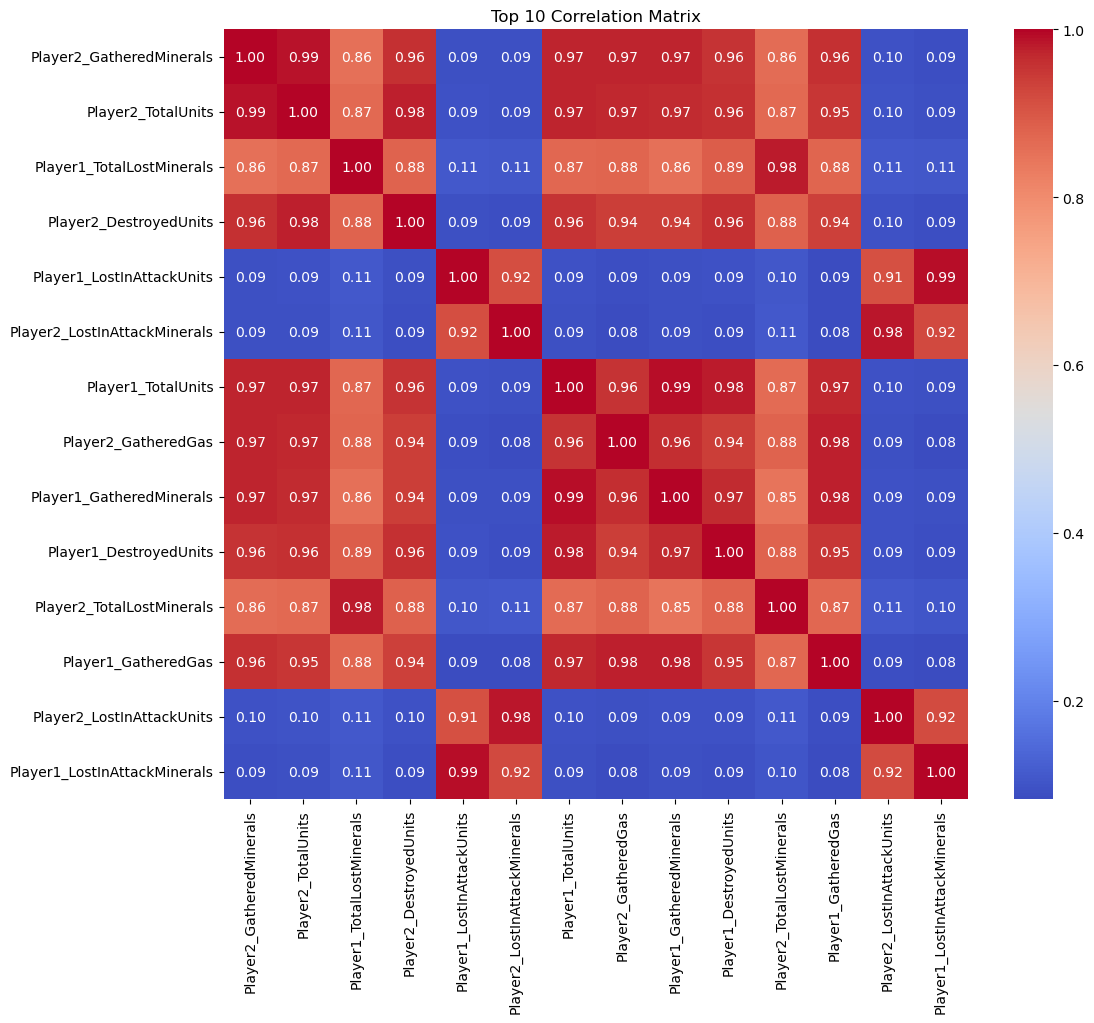

In [51]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

top_feature_pairs = pearson2.index

# Flatten the index pairs to get unique feature names and convert to list
top_features = list({feature for pair in top_feature_pairs for feature in pair})

# Create a new DataFrame to hold the data for these features
top_data = data[top_features]

# Calculate the correlation matrix for this subset of the data
top_corr_matrix = top_data.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(top_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Top 10 Correlation Matrix')
plt.show()

c:\Users\abhin\anaconda3\envs\DevelopmentEnv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\abhin\anaconda3\envs\DevelopmentEnv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\abhin\anaconda3\envs\DevelopmentEnv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


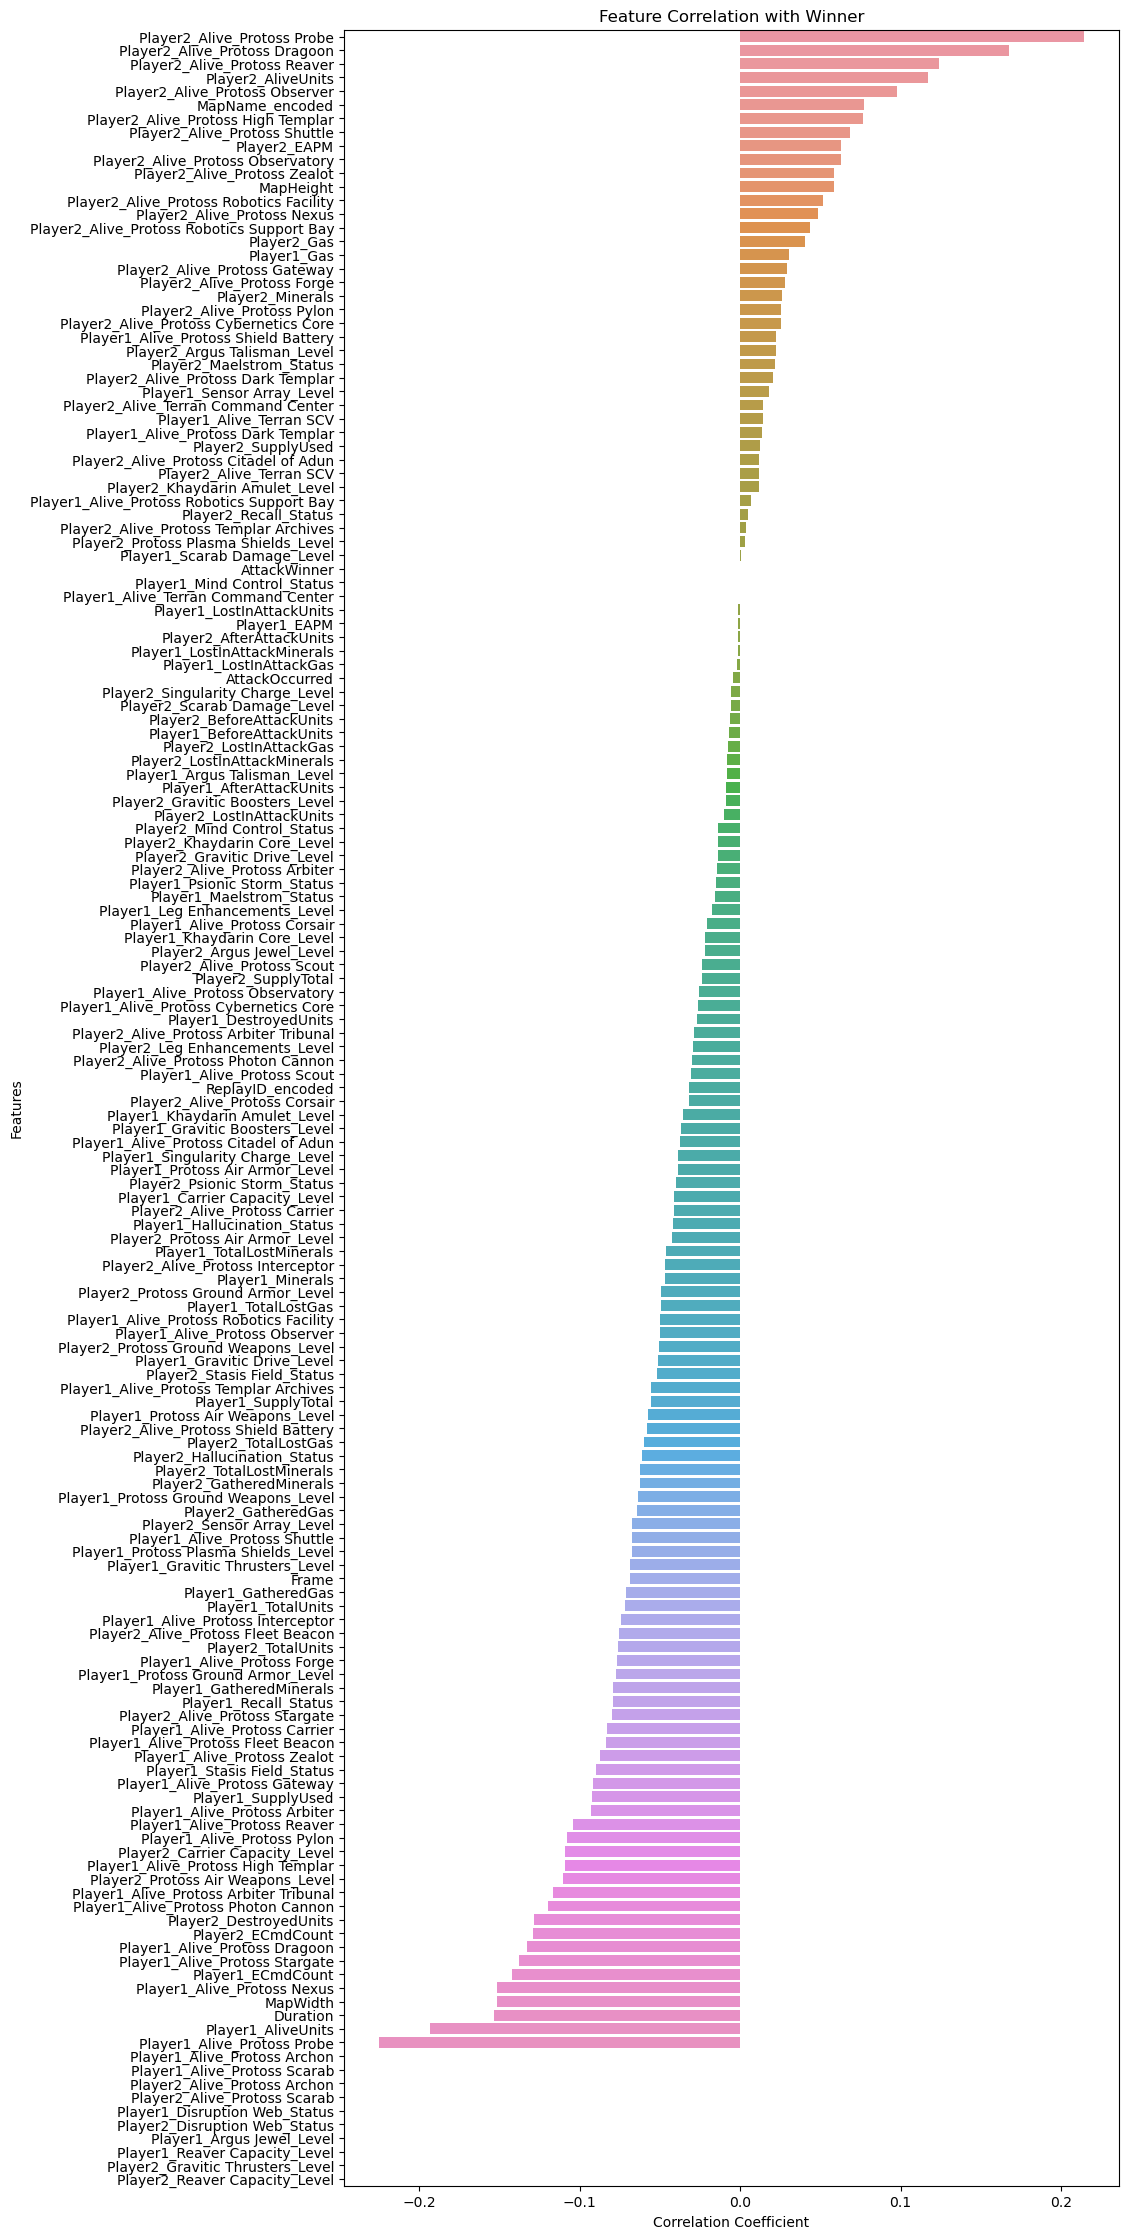

In [52]:
corr_matrix = data.drop(['ReplayID','Player1_Race', 'Player2_Race', 'MapName'], axis=1).corr()

# Extract the 'Winner' correlations (excluding itself)
winner_corr = corr_matrix['Winner'].drop(['Winner'])

# Sorting the correlations for better visualization
winner_corr_sorted = winner_corr.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 28))
sns.barplot(x=winner_corr_sorted.values, y=winner_corr_sorted.index)
plt.title('Feature Correlation with Winner')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

# LR on 80% frame stage

In [53]:
# Load the data
data = pd.read_csv("../Processed Datasets/1D_All_ReplaysData_PvP.csv")

# Assuming combined_data is your DataFrame
data = data.drop(data[data['Winner'] == 0].index)
# Assuming df is your DataFrame and 'ReplayID' is the column to be encoded
label_encoder = LabelEncoder()
data['ReplayID_encoded'] = label_encoder.fit_transform(data['ReplayID'])
# data['Winner'] = label_encoder.fit_transform(data['Winner'])
data['MapName_encoded'] = label_encoder.fit_transform(data['MapName'])

# last_rows = data.groupby('ReplayID').tail(70).groupby('ReplayID').head(1)

# Calculate the 80th percentile of the 'Frame' column within each group of 'ReplayID'
percentile_80_grouped = data.groupby('ReplayID')['Frame'].quantile(0.8)

# Define a function to find the row with the closest 'Frame' value to the 80th percentile within each group
def find_nearest_row(group):
    nearest_index = (group['Frame'] - percentile_80_grouped[group.name]).abs().idxmin()
    return group.loc[[nearest_index]]

# Apply the function to each group of 'ReplayID' and concatenate the results
nearest_rows = data.groupby('ReplayID', group_keys=False).apply(find_nearest_row)

# Reset the index if needed
nearest_rows.reset_index(drop=True, inplace=True)

# Define features (X) and target variable (y)
X = nearest_rows.drop(['ReplayID', 'Winner','Player1_Race', 'Player2_Race', 'MapName'], axis=1)
y = nearest_rows['Winner']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42) # 70% training and 30% test

In [54]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

num_columns = x_train.select_dtypes(include=['int64', 'float64']).columns

In [55]:
num_columns

Index(['Duration', 'Frame', 'MapWidth', 'MapHeight', 'Player1_EAPM',
       'Player1_ECmdCount', 'Player2_EAPM', 'Player2_ECmdCount',
       'Player1_TotalUnits', 'Player1_AliveUnits',
       ...
       'Player2_Leg Enhancements_Level', 'Player2_Protoss Air Armor_Level',
       'Player2_Protoss Air Weapons_Level',
       'Player2_Protoss Ground Armor_Level',
       'Player2_Protoss Ground Weapons_Level',
       'Player2_Protoss Plasma Shields_Level', 'Player2_Reaver Capacity_Level',
       'Player2_Scarab Damage_Level', 'Player2_Sensor Array_Level',
       'Player2_Singularity Charge_Level'],
      dtype='object', length=156)

In [62]:
X = nearest_rows.drop(['ReplayID', 'Winner','Player1_Race', 'Player2_Race', 'MapName'], axis=1)

ct = make_column_transformer(
    (MinMaxScaler(), num_columns),
    (StandardScaler(), num_columns),
    remainder='passthrough'
)

X_scaled = ct.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2,random_state=42) # 70% training and 30% test

In [63]:
lr_clf = LogisticRegression(solver='liblinear', max_iter=1000, C=0.0001)
lr_clf.fit(x_train, y_train)

pred1 = lr_clf.predict(x_train)
pred2 = lr_clf.predict(x_test)

print("Train accuracy:")
print(pd.DataFrame(classification_report(y_train, pred1, output_dict=True)))
print("\nTest accuracy:")
print(pd.DataFrame(classification_report(y_test, pred2, output_dict=True)))

Train accuracy:
                    1           2  accuracy   macro avg  weighted avg
precision    0.700000    0.592417  0.621993    0.646209      0.644915
recall       0.394366    0.838926  0.621993    0.616646      0.621993
f1-score     0.504505    0.694444  0.621993    0.599474      0.601759
support    142.000000  149.000000  0.621993  291.000000    291.000000

Test accuracy:
                   1          2  accuracy  macro avg  weighted avg
precision   0.653846   0.617021  0.630137   0.635434      0.634677
recall      0.485714   0.763158  0.630137   0.624436      0.630137
f1-score    0.557377   0.682353  0.630137   0.619865      0.622433
support    35.000000  38.000000  0.630137  73.000000     73.000000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Cross-validation scores: [0.89189189 0.86486486 0.67567568 0.83783784 0.94444444 0.86111111
 0.75       0.88888889 0.80555556 0.83333333]
Mean accuracy: 0.8353603603603604
Standard deviation of accuracy: 0.07292340813541777


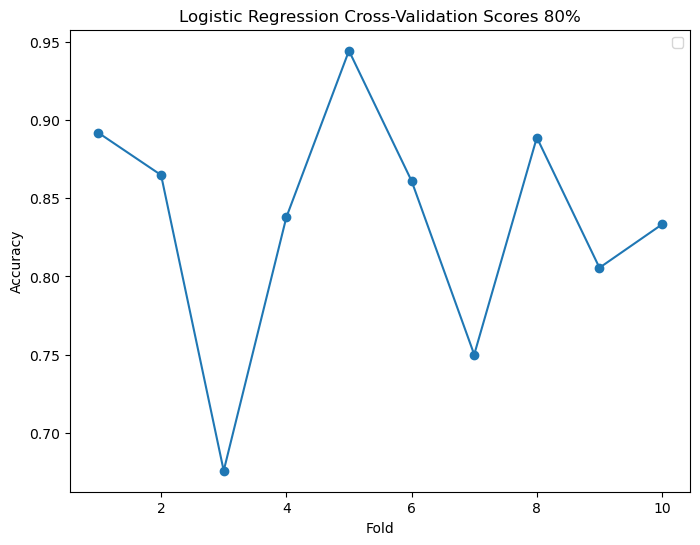

In [64]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(lr_clf, X, y, cv=10)  # You can adjust the number of folds (cv parameter) as needed

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print the mean accuracy and standard deviation of the cross-validation scores
print("Mean accuracy:", cv_scores.mean())
print("Standard deviation of accuracy:", cv_scores.std())

cv_scores80 = cv_scores
# Plot cross-validation scores
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o', linestyle='-')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Logistic Regression Cross-Validation Scores 80%')
plt.legend()
plt.show()


### Parameter tuned LR

In [66]:
lr_clf = LogisticRegression(solver='liblinear', max_iter=1000, C=0.1, penalty='l1')
lr_clf.fit(x_train, y_train)

pred1 = lr_clf.predict(x_train)
pred2 = lr_clf.predict(x_test)

print("Train accuracy:")
print(pd.DataFrame(classification_report(y_train, pred1, output_dict=True)))
print("\nTest accuracy:")
print(pd.DataFrame(classification_report(y_test, pred2, output_dict=True)))

Train accuracy:
                    1           2  accuracy   macro avg  weighted avg
precision    0.859155    0.865772  0.862543    0.862463      0.862543
recall       0.859155    0.865772  0.862543    0.862463      0.862543
f1-score     0.859155    0.865772  0.862543    0.862463      0.862543
support    142.000000  149.000000  0.862543  291.000000    291.000000

Test accuracy:
                   1          2  accuracy  macro avg  weighted avg
precision   0.846154   0.941176  0.890411   0.893665      0.895618
recall      0.942857   0.842105  0.890411   0.892481      0.890411
f1-score    0.891892   0.888889  0.890411   0.890390      0.890329
support    35.000000  38.000000  0.890411  73.000000     73.000000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Cross-validation scores: [0.86486486 0.78378378 0.7027027  0.81081081 0.94444444 0.83333333
 0.72222222 0.77777778 0.86111111 0.77777778]
Mean accuracy: 0.8078828828828829
Standard deviation of accuracy: 0.06795555106747976


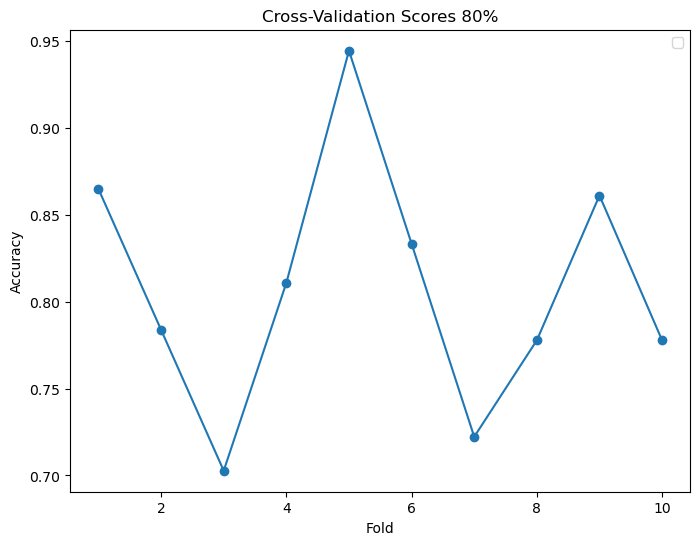

In [67]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(lr_clf, X, y, cv=10)  # You can adjust the number of folds (cv parameter) as needed

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print the mean accuracy and standard deviation of the cross-validation scores
print("Mean accuracy:", cv_scores.mean())
print("Standard deviation of accuracy:", cv_scores.std())

cv_scores80 = cv_scores
# Plot cross-validation scores
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o', linestyle='-')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Scores 80%')
plt.legend()
plt.show()


# LR on 80% frame stage on full dataset

In [68]:
# Load the data

data = pd.read_csv('../Processed Datasets/StarCraft_Combined_Dataset.csv')  

# Assuming combined_data is your DataFrame
data = data.drop(data[data['Winner'] == 0].index)
# Assuming df is your DataFrame and 'ReplayID' is the column to be encoded
label_encoder = LabelEncoder()
label_encoders = {}

for column in ['ReplayID', 'Player1_Race', 'Player2_Race', 'MapName','Winner']:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Calculate the 80th percentile of the 'Frame' column within each group of 'ReplayID'
percentile_80_grouped = data.groupby('ReplayID')['Frame'].quantile(0.8)

# Define a function to find the row with the closest 'Frame' value to the 80th percentile within each group
def find_nearest_row(group):
    nearest_index = (group['Frame'] - percentile_80_grouped[group.name]).abs().idxmin()
    return group.loc[[nearest_index]]

# Apply the function to each group of 'ReplayID' and concatenate the results
nearest_rows = data.groupby('ReplayID', group_keys=False).apply(find_nearest_row)

# Reset the index if needed
nearest_rows.reset_index(drop=True, inplace=True)

# Define features (X) and target variable (y)
X = nearest_rows.drop(['ReplayID', 'Winner','Player1_Race', 'Player2_Race', 'MapName'], axis=1)
y = nearest_rows['Winner']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42) # 70% training and 30% test

In [69]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

num_columns = x_train.select_dtypes(include=['int64', 'float64']).columns

In [70]:
num_columns

Index(['Duration', 'Frame', 'MapWidth', 'MapHeight', 'Player1_EAPM',
       'Player1_ECmdCount', 'Player2_EAPM', 'Player2_ECmdCount',
       'Player1_TotalUnits', 'Player1_AliveUnits',
       ...
       'Player2_Ventral Sacs_Level', 'Player2_Zerg Carapace_Level',
       'Player2_Zerg Flyer Attacks_Level', 'Player2_Zerg Flyer Carapace_Level',
       'Player2_Zerg Melee Attacks_Level',
       'Player2_Zerg Missile Attacks_Level',
       'Player1_Alive_Special Map Revealer', 'Player1_Alive_Zerg Broodling',
       'Player2_Alive_Special Map Revealer', 'Player2_Alive_Zerg Broodling'],
      dtype='object', length=344)

In [74]:
ct = make_column_transformer(
    (MinMaxScaler(), num_columns),
    (StandardScaler(), num_columns),
    remainder='passthrough'
)

X_scaled = ct.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2,random_state=42) # 70% training and 30% test

In [75]:
lr_clf = LogisticRegression(solver='liblinear', max_iter=1000, C=0.0001)
lr_clf.fit(x_train, y_train)

lr_clf.score(x_test, y_test)

0.704225352112676

In [76]:
pred1 = lr_clf.predict(x_train)
pred2 = lr_clf.predict(x_test)

print("Train accuracy:")
print(pd.DataFrame(classification_report(y_train, pred1, output_dict=True)))
print("\nTest accuracy:")
print(pd.DataFrame(classification_report(y_test, pred2, output_dict=True)))

Train accuracy:
                     0            1  accuracy    macro avg  weighted avg
precision     0.701271     0.670189   0.68312     0.685730      0.685244
recall        0.602366     0.758974   0.68312     0.680670      0.683120
f1-score      0.648067     0.711824   0.68312     0.679945      0.680943
support    1099.000000  1170.000000   0.68312  2269.000000   2269.000000

Test accuracy:
                    0           1  accuracy   macro avg  weighted avg
precision    0.710843    0.699060  0.704225    0.704951      0.704723
recall       0.648352    0.755932  0.704225    0.702142      0.704225
f1-score     0.678161    0.726384  0.704225    0.702273      0.703207
support    273.000000  295.000000  0.704225  568.000000    568.000000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Cross-validation scores: [0.75352113 0.8028169  0.81338028 0.78169014 0.82746479 0.76760563
 0.67957746 0.6819788  0.69257951 0.76325088]
Mean accuracy: 0.7563865525307321
Standard deviation of accuracy: 0.05175435853545688


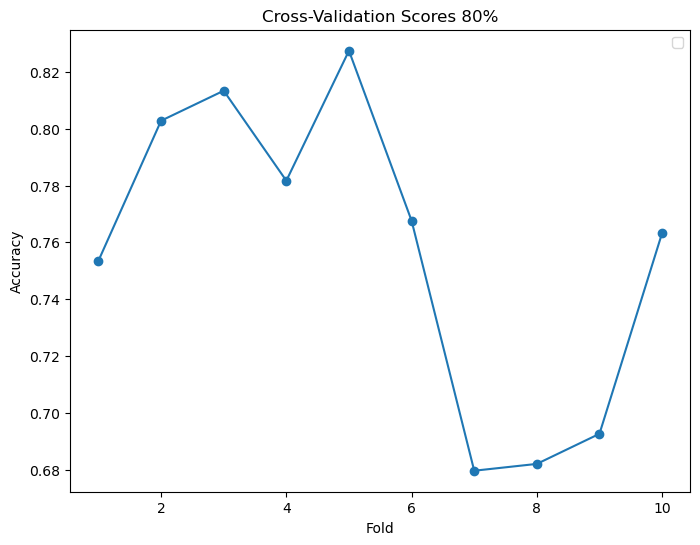

In [72]:
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot as plt

# Perform cross-validation
cv_scores = cross_val_score(lr_clf, X, y, cv=10)  # You can adjust the number of folds (cv parameter) as needed

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print the mean accuracy and standard deviation of the cross-validation scores
print("Mean accuracy:", cv_scores.mean())
print("Standard deviation of accuracy:", cv_scores.std())

cv_scores80 = cv_scores
# Plot cross-validation scores
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o', linestyle='-')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Scores 80%')
plt.legend()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Cross-validation scores: [0.75352113 0.8028169  0.81338028 0.78169014 0.82746479 0.76760563
 0.67957746 0.6819788  0.69257951 0.76325088]
Mean accuracy: 0.7563865525307321
Standard deviation of accuracy: 0.05175435853545688


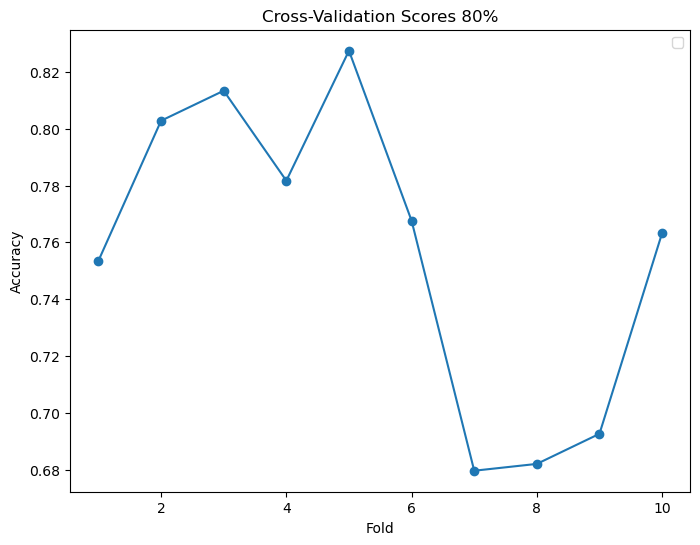

In [12]:
#Parameter tuned

lr_clf = LogisticRegression(solver='liblinear', max_iter=1000, C=0.1, penalty='l1')

# Perform cross-validation
cv_scores = cross_val_score(lr_clf, X, y, cv=10)  # You can adjust the number of folds (cv parameter) as needed

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print the mean accuracy and standard deviation of the cross-validation scores
print("Mean accuracy:", cv_scores.mean())
print("Standard deviation of accuracy:", cv_scores.std())

cv_scores80 = cv_scores
# Plot cross-validation scores
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o', linestyle='-')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Scores 80%')
plt.legend()
plt.show()


### All stages comparison

0.1
Accuracy: 0.64
0.2
Accuracy: 0.67
0.3
Accuracy: 0.67
0.4
Accuracy: 0.70
0.5
Accuracy: 0.71
0.6
Accuracy: 0.72
0.7
Accuracy: 0.72
0.8
Accuracy: 0.75
0.9
Accuracy: 0.78
1.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy: 0.87


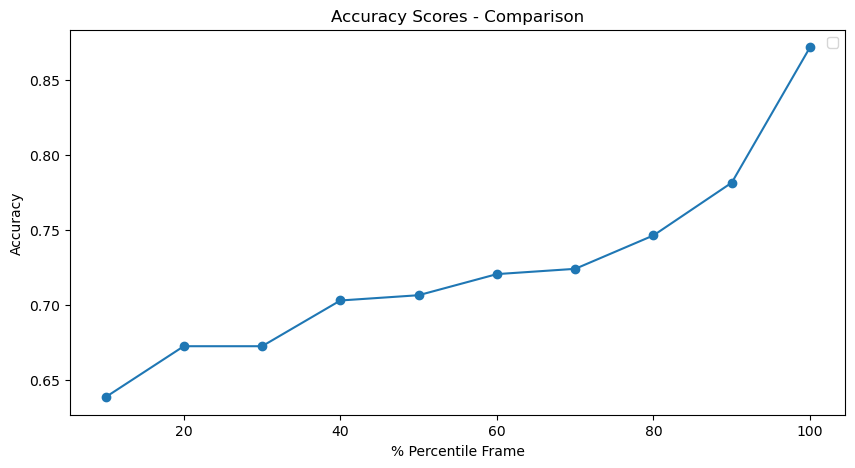

In [11]:
data = pd.read_csv('../Processed Datasets/StarCraft_Combined_Dataset.csv')  

# Assuming combined_data is your DataFrame
data = data.drop(data[data['Winner'] == 0].index)
# Assuming df is your DataFrame and 'ReplayID' is the column to be encoded
label_encoder = LabelEncoder()
label_encoders = {}

for column in ['ReplayID', 'Player1_Race', 'Player2_Race', 'MapName','Winner']:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

def calculate_for_per2(per):
    # Calculate the 80th percentile of the 'Frame' column within each group of 'ReplayID'
    percentile_80_grouped = data.groupby('ReplayID')['Frame'].quantile(per)

    # Define a function to find the row with the closest 'Frame' value to the 80th percentile within each group
    def find_nearest_row(group):
        nearest_index = (group['Frame'] - percentile_80_grouped[group.name]).abs().idxmin()
        return group.loc[[nearest_index]]

    # Apply the function to each group of 'ReplayID' and concatenate the results
    nearest_rows = data.groupby('ReplayID', group_keys=False).apply(find_nearest_row)

    # Reset the index if needed
    nearest_rows.reset_index(drop=True, inplace=True)

    # Define features (X) and target variable (y)
    X = nearest_rows.drop(['ReplayID', 'Winner','Player1_Race', 'Player2_Race', 'MapName'], axis=1)
    y = nearest_rows['Winner']
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42) # 70% training and 30% test
    scaler = StandardScaler()

    X_train_scaled  = scaler.fit_transform(x_train)
    X_test_scaled = scaler.transform(x_test)
    # X_scaled = scaler.transform(X)
    #Create a svm Classifier
    ml = LogisticRegression(solver='liblinear', max_iter=1000, C=0.1, penalty='l1')

    #Train the model using the training sets
    ml.fit(X_train_scaled, y_train)

    #Predict the response for test dataset
    y_pred = ml.predict(X_test_scaled)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')

    # Return cross-validation scores
    return accuracy


plt.figure(figsize=(10, 5))
temp = []
for i in range(10, 110, 10):
    print(i / 100)
    temp.append(calculate_for_per2(i / 100))

plt.plot(range(10, 110, 10),temp, marker='o', linestyle='-')
    
plt.xlabel('% Percentile Frame')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores - Comparison')
plt.legend()
plt.show()
